# Part I - (Prosper Loan Data Exploration)
## by (Adenike Akinbade)

## Introduction
> This document explores a dataset containing peer to peer borrowers data with attributes of approximately 10,000 rows and 81 variables. Prosper Loan is a US based company, launched in 2005. The platform has originted over 20 billion USD loans by matching borrowers to potential investors through their platform. The aim of this analysis is to explore factors that influence  borrowers favorability to access loan.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# loading the dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosperLoanData.csv')

In [3]:
#Performing operations to inspect data
#prints the first 5 rows of the dataset by default

df.head()                

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#gives a concise summary of the dataset
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### What is the structure of your dataset?

> The dataset consist of over 100,000 rows of loans with 81 features like Listing key, Loan Term. Most variables are numeric in nature, but the variables Term, Income Range, and Prosper Rating and few others are ordered factor variables with the their different levels. There sure is a lot of information to explore from the dataset.


### What is/are the main feature(s) of interest in your dataset?

> The purpose of my exploration is to mostly to go in-depth and figure out favourable conditions that are considered when applying for a loan. I'm most interested in figuring out what features are best for predicting loan accessibility of the borrowers in the dataset.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that Income Range, Employment Status, Is Borrower Home owner  will have the strongest effect on loan favourability. The features created by borrowers describing themselves and reasonns to borrow money, what what has changed over the years.

## Data Assessment

The dataframe will be assessed with focus on only the features of interest. A list containing key features will be created.

In [5]:
#Creating a list of our key features

loanDf = ['ListingKey', 'ListingCreationDate', 'Term',
       'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 
       'DateCreditPulled', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 
       'StatedMonthlyIncome', 'LoanOriginalAmount','LoanOriginationDate', 'MonthlyLoanPayment',
       'PercentFunded', 'Recommendations', 'Investors']

In [6]:
#Assessing our features
df[loanDf].sample(10)

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,...,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,PercentFunded,Recommendations,Investors
91456,F7C935925791195147E1D96,2013-10-23 06:50:07.177000000,36,Current,0.24205,0.2045,0.1945,C,1,NY,...,0.46,"$25,000-49,999",True,2500.000000,4000,2013-11-07 00:00:00,149.57,1.0,0,18
104062,832F3600590667500E3D0A7,2014-01-11 21:21:36.413000000,60,Current,0.18197,0.1585,0.1485,C,1,CA,...,0.21,"$50,000-74,999",True,5833.333333,9000,2014-01-14 00:00:00,218.15,1.0,0,1
90282,4DE83590821845442375CFA,2013-10-02 12:07:59.757000000,36,Current,0.33215,0.2925,0.2825,E,1,CA,...,0.31,"$25,000-49,999",True,4000.000000,4000,2013-10-04 00:00:00,168.17,1.0,0,1
113869,D1BC35453654346955F1438,2012-04-18 17:10:48.980000000,60,Completed,0.24702,0.2220,0.2120,C,1,PA,...,0.72,"$1-24,999",True,1666.666667,10000,2012-04-20 00:00:00,277.33,1.0,0,19
20291,5A3F350232814744444AF5A,2010-12-10 19:25:45.590000000,36,Completed,0.36280,0.3220,0.3120,E,1,MI,...,0.08,"$50,000-74,999",True,4583.333333,1500,2010-12-21 00:00:00,65.50,1.0,0,28
55693,B53D3561676345942E60D90,2012-10-24 12:14:58.860000000,60,Completed,0.23656,0.2118,0.2018,C,1,OH,...,0.19,"$25,000-49,999",True,2916.666667,11500,2012-10-30 00:00:00,312.28,1.0,0,103
43630,5932355543801173866463E,2012-08-20 16:44:10.057000000,12,Completed,0.26478,0.1863,0.1763,D,3,CA,...,NaN,"$25,000-49,999",False,2500.000000,6000,2012-08-29 00:00:00,0.00,1.0,0,103
44174,56153594800775458A7409F,2013-11-15 12:30:12.167000000,36,Current,0.15324,0.1249,0.1149,A,1,MI,...,0.23,"$25,000-49,999",True,2500.000000,4000,2013-11-20 00:00:00,133.80,1.0,0,1
21287,5C373601753135692AF7735,2014-01-25 17:50:20.893000000,60,Current,0.16662,0.1435,0.1335,B,1,OH,...,0.19,"$100,000+",True,10559.083333,20000,2014-02-05 00:00:00,469.00,1.0,0,1
62066,E9913557094625649228265,2012-08-27 12:17:53.057000000,60,Current,0.24682,0.2218,0.2118,C,1,IN,...,0.14,"$25,000-49,999",True,2416.666667,5000,2012-08-30 00:00:00,138.61,1.0,0,6


In [7]:
df[loanDf].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
ListingKey                   113937 non-null object
ListingCreationDate          113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
IsBorrowerHomeowner          113937 non-null bool
CurrentlyInGroup             113937 non-null bool
DateCreditPulled             113937 non-null object
DebtToIncomeRatio            105383 non-null float64
IncomeRange                  113937 non-null object
IncomeVe

As we can see, few of our targeted features have null values

In [8]:
#checking for duplicates
df[loanDf].duplicated().sum()

871

We have 871 duplicates.

## Data Cleaning

In [9]:
#making a copy of our keyfeatures
cleanLoanDf = df[loanDf].copy()

#verifying changes
assert len(cleanLoanDf.columns) == len(loanDf)

In [10]:
#dropping duplicates
cleanLoanDf = cleanLoanDf.drop_duplicates()

#verifying changes
assert not cleanLoanDf.duplicated().any()

In [11]:
#renaming improper column names
cleanLoanDf = cleanLoanDf.rename(columns = {'ProsperRating (Alpha)': 'ProsperRating', 'ListingCategory (numeric)': 'ListingCategory'})

#verify changes
cleanLoanDf.columns

Index(['ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus',
       'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperRating',
       'ListingCategory', 'BorrowerState', 'Occupation', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'DateCreditPulled',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate',
       'MonthlyLoanPayment', 'PercentFunded', 'Recommendations', 'Investors'],
      dtype='object')

In [12]:
#checking null values
nullValue = cleanLoanDf.isnull().sum()
nullValue

ListingKey                 0
ListingCreationDate        0
Term                       0
LoanStatus                 0
BorrowerAPR               25
BorrowerRate               0
LenderYield                0
ProsperRating          29084
ListingCategory            0
BorrowerState           5515
Occupation              3529
EmploymentStatus        2255
IsBorrowerHomeowner        0
CurrentlyInGroup           0
DateCreditPulled           0
DebtToIncomeRatio       8472
IncomeRange                0
IncomeVerifiable           0
StatedMonthlyIncome        0
LoanOriginalAmount         0
LoanOriginationDate        0
MonthlyLoanPayment         0
PercentFunded              0
Recommendations            0
Investors                  0
dtype: int64

In [13]:
#checking proportion of null 
#create list of null columns with null values
numColumn = ['BorrowerAPR', 'ProsperRating', 'DebtToIncomeRatio']
nullValue = [cleanLoanDf[col].isnull().sum() for col in numColumn]

#calculate the proportion of null values
sum(nullValue)/df.shape[0]

0.32984017483346062

Since the proportion of null values is about 30%, we still have enough data to carry out our analysis, I'll be dropping the null values

In [14]:
#getting null columns in the numeric features
for col in numColumn:
    cleanLoanDf = cleanLoanDf[cleanLoanDf[col].notnull()]
    
#verifying result
for col in numColumn:
    assert cleanLoanDf[col].notnull().any()

In [15]:
#improper data type
#converting ListingCreationDate and  LoanOriginationDate to a datetime object
cleanLoanDf.ListingCreationDate =  pd.to_datetime(cleanLoanDf.ListingCreationDate)
cleanLoanDf.LoanOriginationDate =  pd.to_datetime(cleanLoanDf.LoanOriginationDate)

In [16]:
#Creating month and year columns
cleanLoanDf['ListingCreationMonth'] = pd.to_datetime(cleanLoanDf['ListingCreationDate']).dt.month
cleanLoanDf['ListingCreationYear'] = pd.to_datetime(cleanLoanDf['ListingCreationDate']).dt.month
cleanLoanDf['LoanOriginationMonth'] = pd.to_datetime(cleanLoanDf['LoanOriginationDate']).dt.month
cleanLoanDf['LoanOriginationYear'] = pd.to_datetime(cleanLoanDf['LoanOriginationDate']).dt.year


In [17]:
#selecting numeric variables in our  df to check for skewess value
numColumns = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'DebtToIncomeRatio', 'StatedMonthlyIncome',
            'LoanOriginalAmount', 'MonthlyLoanPayment', 'PercentFunded']
#printing skewess values
cleanLoanDf[numColumns].skew()

BorrowerAPR             0.150633
BorrowerRate            0.233594
LenderYield             0.233439
DebtToIncomeRatio      21.720614
StatedMonthlyIncome    35.439804
LoanOriginalAmount      1.098012
MonthlyLoanPayment      1.385113
PercentFunded         -11.918581
dtype: float64

In [18]:
#Detecting outliers using IQR(Inter-Quartile Range)
#setting the 25th & 75th percentile of the revenue variable
#This code shows the interquartle range value of the numeric variables
Q1 = cleanLoanDf[numColumns].quantile(0.25)
Q3 = cleanLoanDf[numColumns].quantile(0.75)
IQR = Q3 - Q1

In [19]:
#I'll be using Flooring and capping method to treat the outliers
#the code drops the outliers by removing values that are below 25th percentile and above 75th percentile in the revenue variable

cleanLoanDf = cleanLoanDf[~((cleanLoanDf[numColumns] < (Q1 - 1.5 * IQR)) |(cleanLoanDf[numColumns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [20]:
#verifying change
cleanLoanDf[numColumns].skew()

BorrowerAPR            0.131216
BorrowerRate           0.212988
LenderYield            0.212825
DebtToIncomeRatio      0.518743
StatedMonthlyIncome    0.732193
LoanOriginalAmount     0.839031
MonthlyLoanPayment     0.673844
PercentFunded          0.000000
dtype: float64

In [21]:
cleanLoanDf.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,Investors,ListingCreationMonth,ListingCreationYear,LoanOriginationMonth,LoanOriginationYear
count,69361.000000,69361.000000,69361.000000,69361.000000,69361.000000,69361.000000,69361.000000,69361.000000,69361.000000,69361.0,69361.000000,69361.000000,69361.000000,69361.000000,69361.000000,69361.000000
mean,42.887444,0.224816,0.194505,0.184500,3.309915,0.241117,5350.587707,8631.268681,273.755358,1.0,0.016969,64.861695,6.714595,6.714595,6.704805,2012.371304
std,11.711666,0.078663,0.073454,0.073455,4.397588,0.115404,2418.026739,5612.456207,156.541545,0.0,0.192605,89.029063,3.652787,3.652787,3.676002,1.208232
min,12.000000,0.045830,0.040000,0.030000,0.000000,0.010000,166.666667,1000.000000,0.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,2009.000000
25%,36.000000,0.163280,0.135900,0.125900,1.000000,0.150000,3500.000000,4000.000000,152.870000,1.0,0.000000,1.000000,3.000000,3.000000,3.000000,2012.000000
50%,36.000000,0.216990,0.187400,0.177400,1.000000,0.220000,5000.000000,7500.000000,242.470000,1.0,0.000000,30.000000,7.000000,7.000000,7.000000,2013.000000
75%,60.000000,0.287800,0.254900,0.244900,3.000000,0.320000,6666.666667,13000.000000,375.980000,1.0,0.000000,94.000000,10.000000,10.000000,10.000000,2013.000000
max,60.000000,0.423950,0.360000,0.340000,20.000000,0.570000,12608.333333,28500.000000,742.390000,1.0,19.000000,1189.000000,12.000000,12.000000,12.000000,2014.000000


In [22]:
cleanLoanDf['ProsperRating'].value_counts()

C     15393
B     12840
A     11910
D     11833
E      7990
HR     4928
AA     4467
Name: ProsperRating, dtype: int64

In [23]:
cleanLoanDf['LoanStatus'].value_counts()

Current                   46644
Completed                 16096
Chargedoff                 3998
Defaulted                   809
Past Due (1-15 days)        655
Past Due (31-60 days)       293
Past Due (91-120 days)      245
Past Due (61-90 days)       236
Past Due (16-30 days)       209
FinalPaymentInProgress      163
Past Due (>120 days)         13
Name: LoanStatus, dtype: int64

In [24]:
#storing prosper status in an ordered form
varStatus = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
prosperStatus = pd.api.types.CategoricalDtype(ordered = True, categories = varStatus)
cleanLoanDf['ProsperRating'] = cleanLoanDf['ProsperRating'].astype(prosperStatus);

In [25]:
#storing income status in an ordered form
incomeorder = ['$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
incomeStatus = pd.api.types.CategoricalDtype(ordered = True, categories = incomeorder)
cleanLoanDf['IncomeRange'] = cleanLoanDf['IncomeRange'].astype(incomeStatus);

In [26]:
#storing loan status in an ordered form
loanorder = ['Current', 'Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)',
              'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Chargedoff', 'Defaulted']
loanStatus = pd.api.types.CategoricalDtype(ordered = True, categories = loanorder)
cleanLoanDf['LoanStatus'] = cleanLoanDf['LoanStatus'].astype(loanStatus);

## Univariate Exploration


### Question 1 : How is Loan Original Amount distributed in the dataset?
#### Visualization

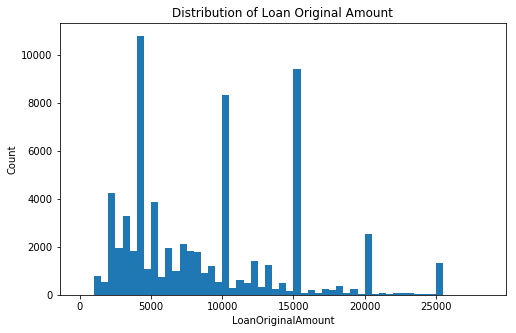

In [27]:
#start with a standard-scaled plot
binsize = 500
bins = np.arange(0, cleanLoanDf['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = cleanLoanDf, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count')
plt.title('Distribution of Loan Original Amount')
plt.show()

#### *Observation* : Distribution of loan original amount is skewed to the right i.e positively skewed. Which signifies that the mean value is greater than the median value. The highest count is a value of about 5,000, which may mean that most borrowers request for multiples of about 5,000.

### Question 2 : How is Monthly Loan Payment distributed in the dataset?
#### Visualization

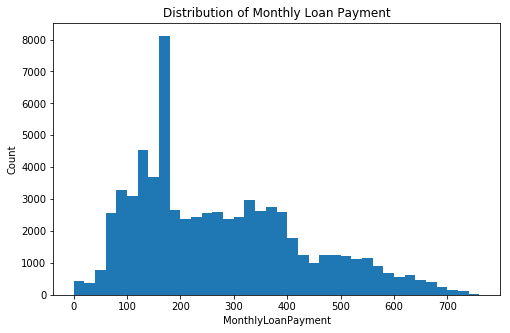

In [28]:
#start with a standard-scaled plot
binsize = 20
bins = np.arange(0, cleanLoanDf['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = cleanLoanDf, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('Count')
plt.title('Distribution of Monthly Loan Payment')
plt.show()

#### *Observation* : Distribution of monthly loan payment is skewed to the right i.e positively skewed. Which signifies that the mean value is greater than the median value. There is a peak at about 105, which may mean that most borrowers pay back in multiples of about 150.

### Question 3 : How is Stated Monthly Income distributed in the dataset?
#### Visualization

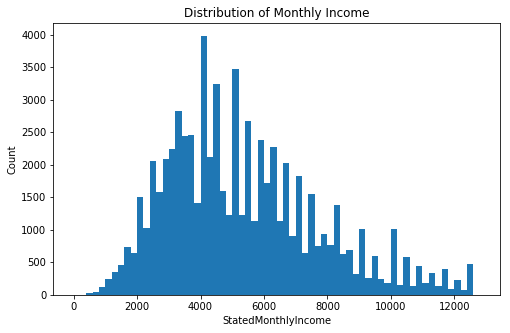

In [29]:
#start with a standard-scaled plot
binsize = 200
bins = np.arange(0, cleanLoanDf['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = cleanLoanDf, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count')
plt.title('Distribution of Monthly Income')
plt.show()

#### *Observation* : Distribution of monthly loan payment is skewed to the right i.e positively skewed. Which signifies that the mean value is greater than the median value.

### Question 4 : How is Borrower APR(Annual Percentage Rate) distributed in the dataset?
#### Visualization

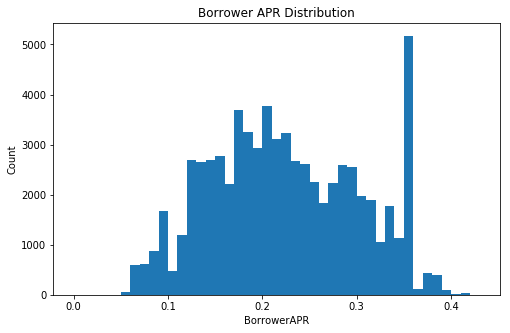

In [30]:
#start with a standard-scaled plot
binsize = 0.01
bins = np.arange(0, cleanLoanDf['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = cleanLoanDf, x = 'BorrowerAPR', bins = bins)
plt.xlabel('BorrowerAPR')
plt.ylabel('Count')
plt.title('Borrower APR Distribution')
plt.show()

#### *Observation* : Distribution of Borrower APR appear to be normally distributed, except for a peak at 0.36.

### Question 5 : How is Categorical data distributed in the dataset?

In [31]:
#Using a bar plot function to plot categorical data distribution
def bar_chart(var1):
    plt.figure(figsize = [8,5])
    base_color = sb.color_palette()[0]
    sb.countplot(data=cleanLoanDf, x=cleanLoanDf[var1], color=base_color);
    plt.ylabel(f'Count of {var1}')
    plt.title(f'Distribution of {var1}')

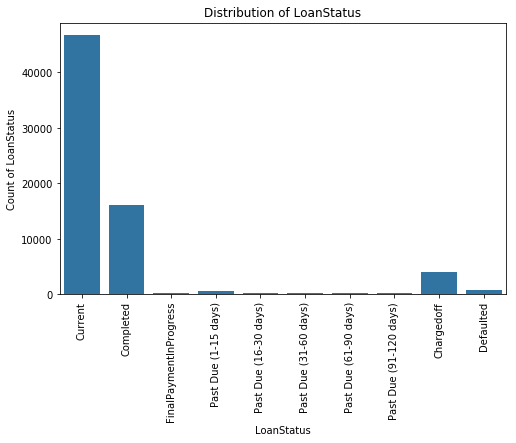

In [32]:
#loan status distribution
bar_chart('LoanStatus')
plt.xticks(rotation=90);

#### *Observation* : Most loans are still in their current state 

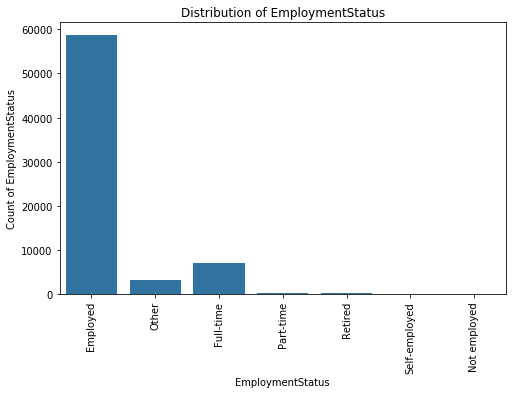

In [33]:
bar_chart('EmploymentStatus')
plt.xticks(rotation=90);

#### *Observation* : Most borrowers are employed.

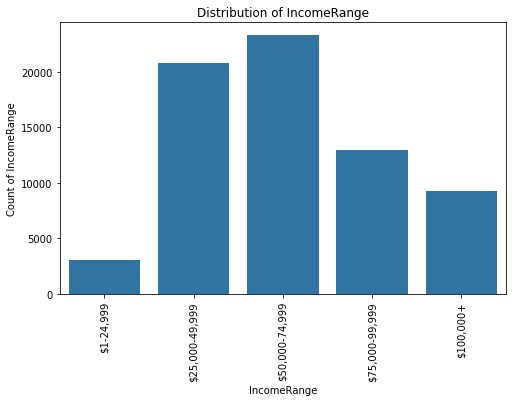

In [34]:
bar_chart('IncomeRange')
plt.xticks(rotation=90);

#### *Observation* : Most borrowers earn between 50,000 -  74,999.

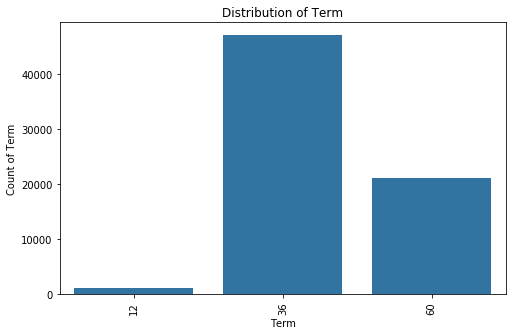

In [35]:
bar_chart('Term')
plt.xticks(rotation=90);

#### *Observation* : Most borrowers loan term is a duration of 36 months.

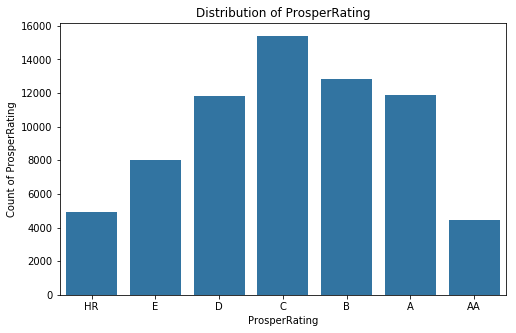

In [36]:
bar_chart('ProsperRating');

#### *Observation* : Most loan received a median rating of C.

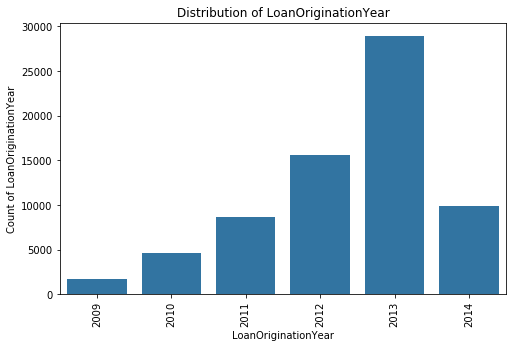

In [37]:
bar_chart('LoanOriginationYear')
plt.xticks(rotation=90);

#### *Observation* : The rate at which loan is being borrwers appear to increase over the year.

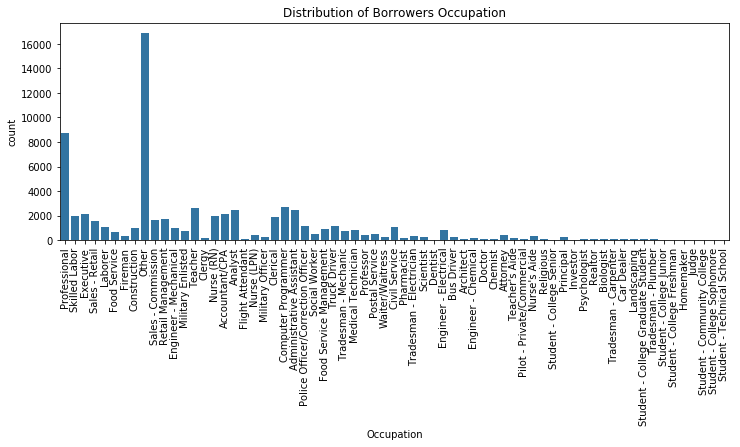

In [38]:
plt.figure(figsize = [12,4])
base_color = sb.color_palette()[0]
sb.countplot(data=cleanLoanDf, x='Occupation', color=base_color)
plt.xticks(rotation=90);
plt.title('Distribution of Borrowers Occupation');

#### *Observation* : Majority of the borrowers are professionals, while a whole lot have other occupations.

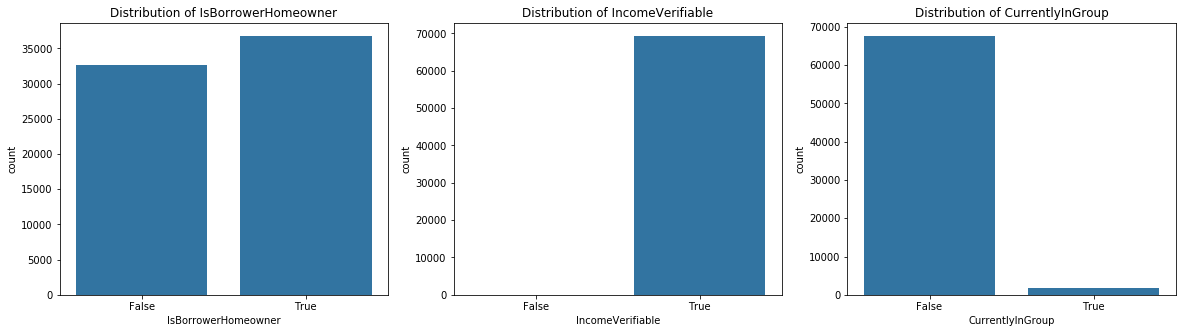

In [39]:
#distribution of our boolean data types

fig= plt.figure(figsize=(20,5))
#IsBorrowerHomeOwner
plt.subplot(1,3,1)
sb.countplot(data=cleanLoanDf, x='IsBorrowerHomeowner', color=sb.color_palette()[0])
plt.title('Distribution of IsBorrowerHomeowner')

#Income verifiable
plt.subplot(1,3,2)
sb.countplot(data=cleanLoanDf, x='IncomeVerifiable', color=sb.color_palette()[0])
plt.title('Distribution of IncomeVerifiable')


#Currently In Group
plt.subplot(1,3,3)
sb.countplot(data=cleanLoanDf, x='CurrentlyInGroup', color=sb.color_palette()[0])
plt.title('Distribution of CurrentlyInGroup');



#### *Observation* : Most of the borrowers are home owners, a whole lot have their income verifiable, and majority are not in group.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I splitted loan origination date and listing date into year and month, which helped with the yearly analysis. There appear to be a few peak in the loan original amount, I'll explore more if it's based on some specic factors

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Term is being treated as a numeric Categorical variable. Prosper rating and income range were arranged in an oredered format 

## Bivariate Exploration

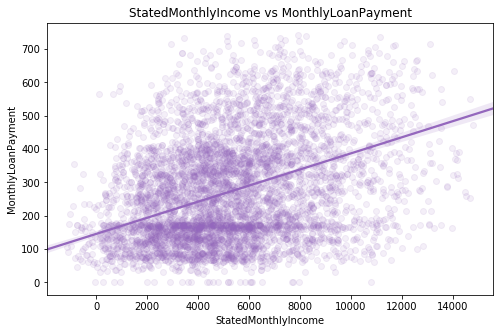

In [40]:
#plotting a reg plot of monthly income vs monthly loan payment
plt.figure(figsize=(8, 5))
sb.regplot(data=cleanLoanDf.sample(5000, random_state=1), x='StatedMonthlyIncome', y='MonthlyLoanPayment', x_jitter=2500, color=sb.color_palette()[4], 
           scatter_kws={'alpha': 0.1})
plt.title('StatedMonthlyIncome vs MonthlyLoanPayment');

 #### *Observation* : A positive correlation is shown between the two variables.

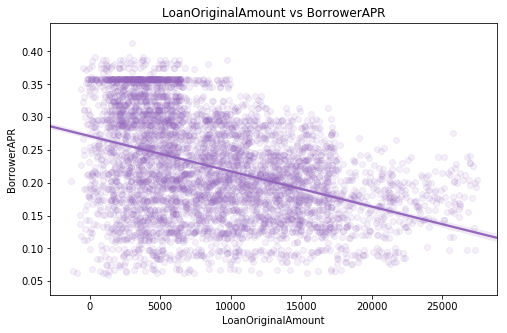

In [41]:
#plotting a reg plot of loan amount vs borrower apr
plt.figure(figsize=(8, 5))
sb.regplot(data=cleanLoanDf.sample(5000, random_state=1), x='LoanOriginalAmount', y='BorrowerAPR', x_jitter=2500, color=sb.color_palette()[4], 
           scatter_kws={'alpha': 0.1})
plt.title('LoanOriginalAmount vs BorrowerAPR');

#### *Observation* : A negative  correlation is shown between the two variables.

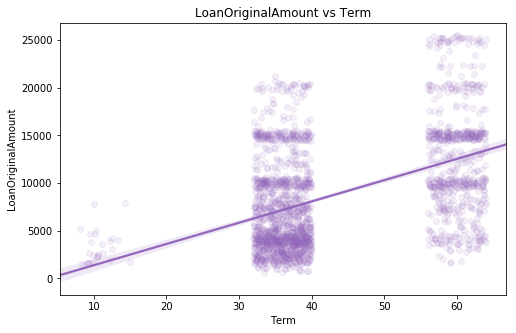

In [42]:
#plotting a reg plot of loan amount vs term
plt.figure(figsize=(8,5))
sb.regplot(data=cleanLoanDf.sample(2000, random_state=1), x='Term', y='LoanOriginalAmount', x_jitter=4,
           color=sb.color_palette()[4], y_jitter=500, scatter_kws={'alpha': 0.1})
plt.title('LoanOriginalAmount vs Term');

#### *Observation* : A positive  correlation is shown between the two variables. Which shows that as loan term increases loan amount increases as well.

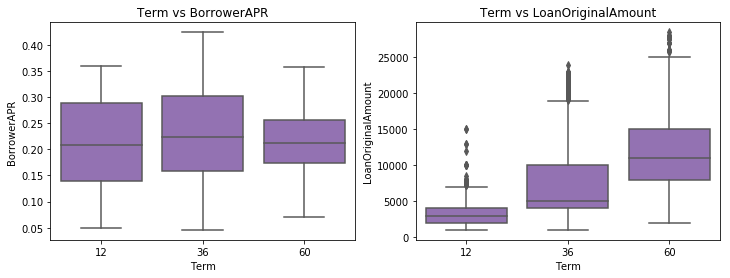

In [43]:
#converting the term column from an integer type to a categirical type
#twoplots in a figure
plt.figure(figsize=(12,4))
base_color = sb.color_palette()[4]
#left plot
plt.subplot(1, 2, 1)
ax1 = sb.boxplot(data=cleanLoanDf, x= 'Term', y='BorrowerAPR', color = base_color)
plt.title('Term vs BorrowerAPR')

#right plot
plt.subplot(1, 2, 2)
ax2 = sb.boxplot(data=cleanLoanDf, x= 'Term', y='LoanOriginalAmount', color = base_color)
plt.title('Term vs LoanOriginalAmount');


#### *Observation* : Mean borrower apr rate is slightly up at the 36 month term, It's seen in the second plot that Loan amount increases as term increases which similar to our previous observation.

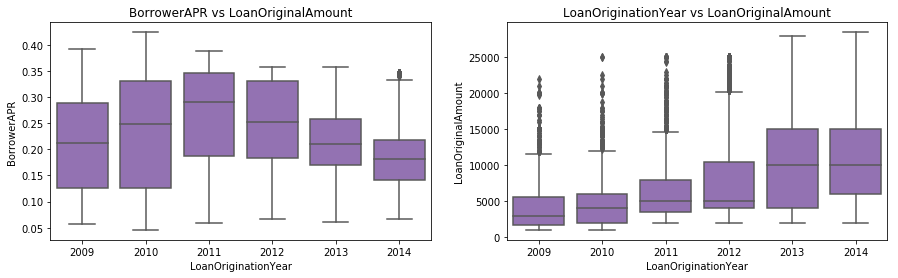

In [44]:
#converting the term column from an integer type to a categirical type
#twoplots in a figure
plt.figure(figsize=(15,4))
base_color = sb.color_palette()[4]
#left plot
plt.subplot(1, 2, 1)
ax1 = sb.boxplot(data=cleanLoanDf, x= 'LoanOriginationYear', y='BorrowerAPR', color = base_color)
plt.title('BorrowerAPR vs LoanOriginalAmount')

#right plot
plt.subplot(1, 2, 2)
ax2 = sb.boxplot(data=cleanLoanDf, x= 'LoanOriginationYear', y='LoanOriginalAmount', color = base_color)
plt.title('LoanOriginationYear vs LoanOriginalAmount');


#### *Observation* : Borrower APR seems to vary over the years, It's seen in the second plot that Loan amount increases over the years.

cleanLoanDf[numCol].shape= (69361, 5)
cleanLoanDfSamp.shape= (1000, 5)


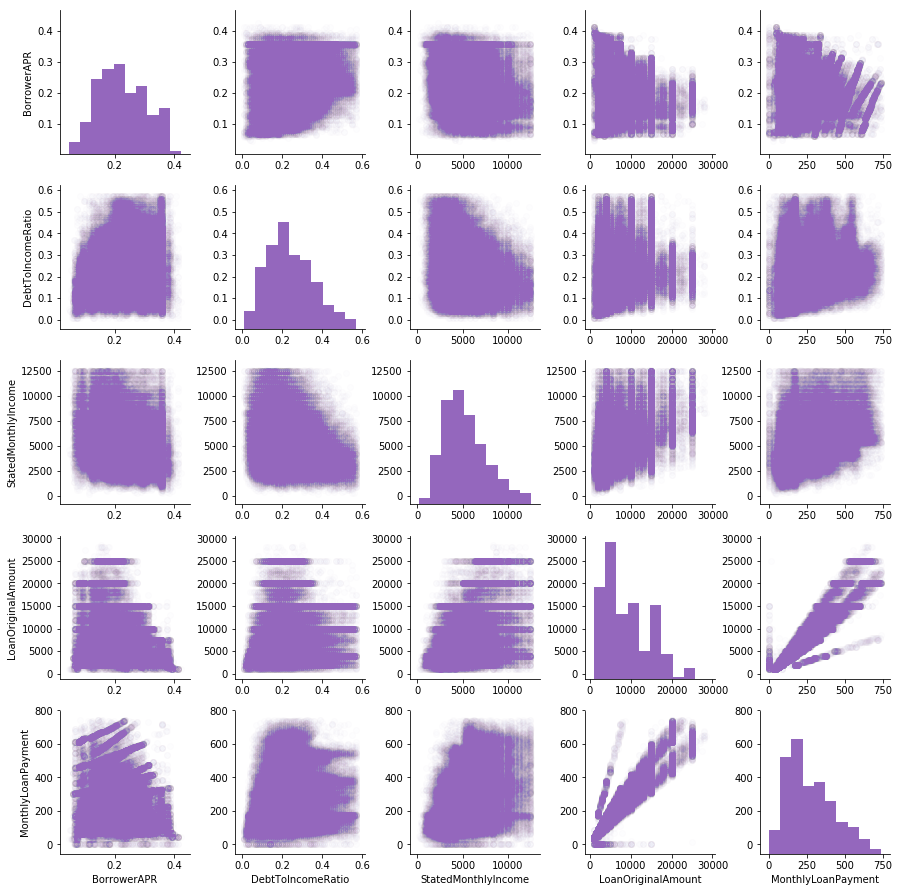

In [45]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
#storing numeric variables in a list
numCol=['BorrowerAPR', 'DebtToIncomeRatio', 'StatedMonthlyIncome',   'LoanOriginalAmount', 'MonthlyLoanPayment']
print("cleanLoanDf[numCol].shape=",cleanLoanDf[numCol].shape)
cleanLoanDfSamp = cleanLoanDf[numCol].sample(n=1000, replace = False)
print("cleanLoanDfSamp.shape=", cleanLoanDfSamp.shape)

#create a scatter plot of each column
g =sb.PairGrid(cleanLoanDf[numCol])
g.map_diag(plt.hist, color=sb.color_palette()[4])
g.map_offdiag(plt.scatter, color=sb.color_palette()[4], alpha=0.01);


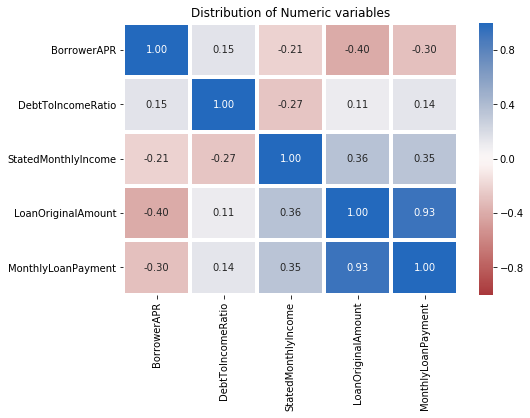

In [46]:
#visualize the correlation btwn the numeric variales in a heat map
plt.figure(figsize=(7.5, 5))
sb.heatmap(data=cleanLoanDf[numCol].corr(), annot=True, fmt='.2f', cmap='vlag_r', vmin=-1, vmax=1, linewidth=3 )
plt.xticks(rotation=90)
plt.title('Distribution of Numeric variables');

#### *Observation* : This also shows a negative relationship between BorrowerAPR and LoanOriginalAmount (-0.40). Whuch means that the larger the loan the lesser the APR. A moderate relationship(0.34) is seen between Monthly Income and Monthly Payment. there is no notable relationship between other features, The negative correlation btwn Monthly Payment and Borrower APR seems to be becaust The APR is an annual estimate.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Borrower APR shows an inverse relationship with loan amount. Loan amount have some relatioship with Term, and loan year



## Multivariate Exploration


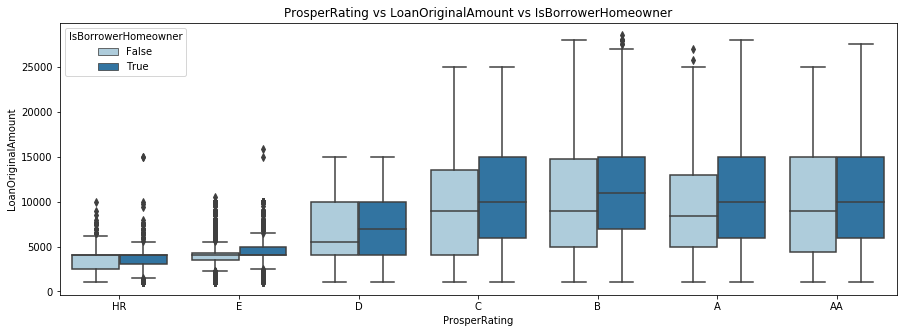

In [47]:
#plotting a box plot of loan amount vs ProsperRating vs IsBorrowerHomeowner
plt.figure(figsize=(15,5))
sb.boxplot(data=cleanLoanDf, x='ProsperRating', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', palette='Paired')
plt.title('ProsperRating vs LoanOriginalAmount vs IsBorrowerHomeowner');

#### *Observation* : Home owners receive higher rating and seems to get higher loans

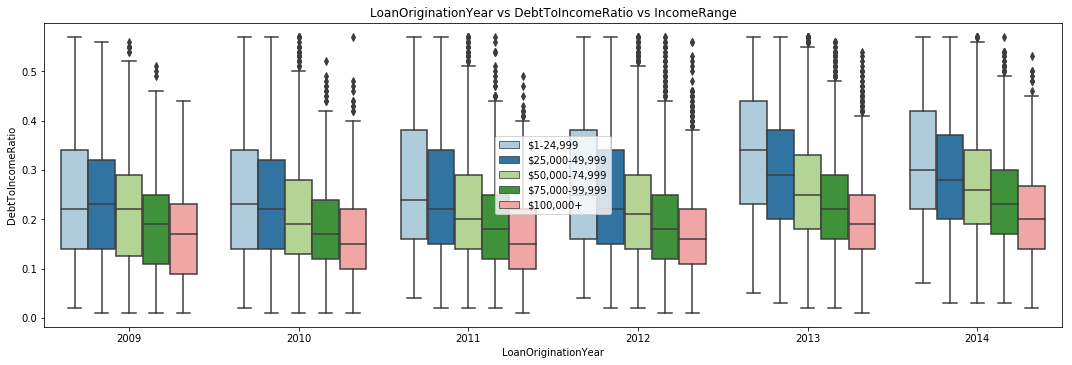

In [48]:
#plotting a box plot of loan year vs DebtToIncomeRatio vs IncomeRange
plt.figure(figsize=(15,5))
sb.boxplot(data=cleanLoanDf, x='LoanOriginationYear', y='DebtToIncomeRatio', hue='IncomeRange', palette='Paired');
plt.legend(loc='best')
plt.tight_layout()
plt.title('LoanOriginationYear vs DebtToIncomeRatio vs IncomeRange');


#### *Observation* : Borrowers with high income have lower debt to income ratio and low income borrowers get higher. DTI ratio seem to be dependent on borrowers income, and its been that way since 2010.

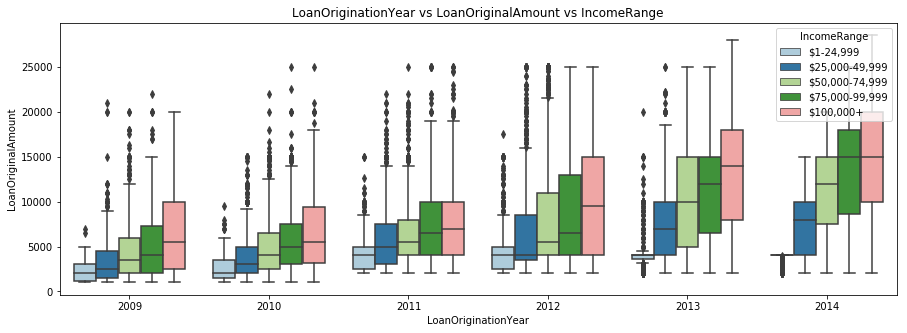

In [49]:
#plotting a box plot of loan year vs LoanOriginalAmount vs IncomeRange
plt.figure(figsize=(15,5))
sb.boxplot(data=cleanLoanDf, x='LoanOriginationYear', y='LoanOriginalAmount', hue='IncomeRange', palette='Paired')
plt.title('LoanOriginationYear vs LoanOriginalAmount vs IncomeRange');


#### *Observation* : The higher the borrowers income the higher the loan they get. 

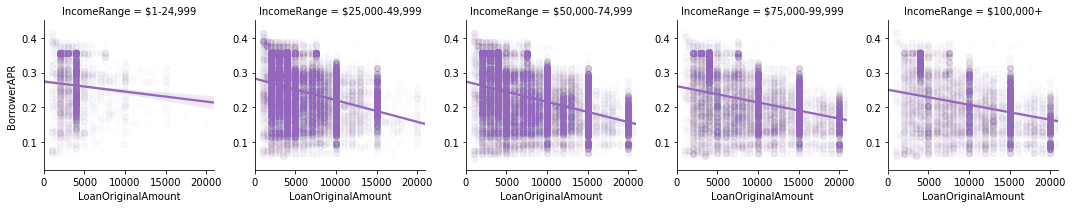

In [50]:
#plotting a reg plot of BorrowerAPR vs LoanOriginalAmount vs IncomeRange
fig=sb.FacetGrid(data=cleanLoanDf, col='IncomeRange')
fig.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', color=sb.color_palette()[4], scatter_kws={'alpha':0.01});

#### *Observation* : The higher the borrowers income the higher the loan they get. The slope appears to become less slesp as income increases, this is an indicator that the effect of income on APR diminishes gradually as incime rises.

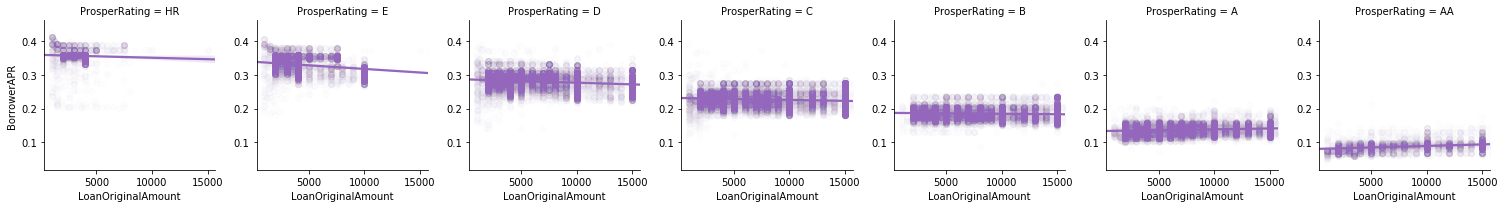

In [51]:
#plotting a reg plot of BorrowerAPR vs LoanOriginalAmount vs ProsperRating
fig=sb.FacetGrid(data=cleanLoanDf, col='ProsperRating')
fig.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', color=sb.color_palette()[4], scatter_kws={'alpha':0.01});


#### *Observation* : There is a reducing effect of Rating on APR. As seen here borrowers APR reduces with high rating. 

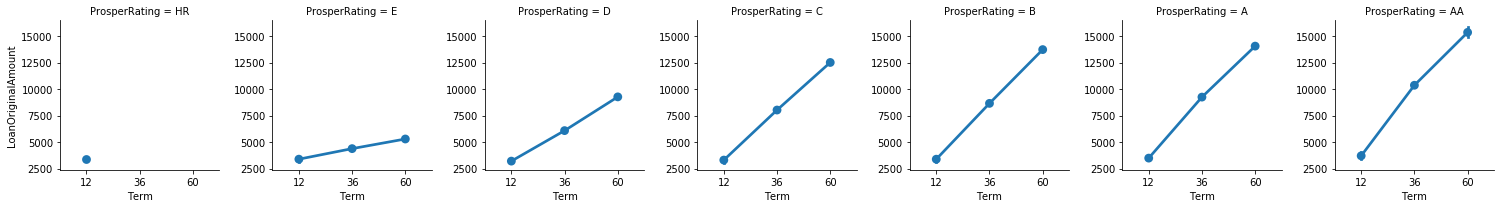

In [52]:
#plotting a point plot of Term vs LoanOriginalAmount vs ProsperRating
fig=sb.FacetGrid(data=cleanLoanDf, col='ProsperRating')
fig.map(sb.pointplot, 'Term', 'LoanOriginalAmount', order=None);

#### *Observation* : Borrowers with high rating appear to receive higher loans with longer term.

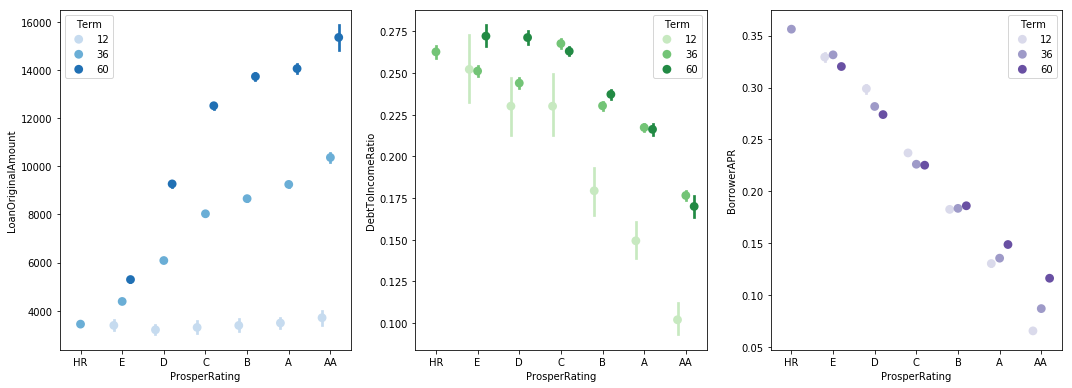

In [53]:
#plotting a point plot of DebtToIncomeRatio vs LoanOriginalAmount vs BorrowerAPR
#creating list of columns to plot on y-axis
y_columns = ['LoanOriginalAmount', 'DebtToIncomeRatio', 'BorrowerAPR']
#Create list of color palette
palette = ['Blues', 'Greens', 'Purples']
plt.figure(figsize=(15, 5.5))
for col, index, colors in zip(y_columns, range(3), palette):
    plt.subplot(1, 3, index+1)
    sb.pointplot(data=cleanLoanDf, x='ProsperRating', y=col, hue='Term', linestyles='', palette=colors, dodge=0.4)
    
plt.tight_layout();



#### *Observation* : Borrowers with high rating appear to receive higher loans with longer term, less APR and less Debt to income ratio.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Borrowers that get high ratings receives higher loans with longer term, less APR and less Debt to income ratio.

### Were there any interesting or surprising interactions between features?

> Borrowers apr been negatively correlated with loan original amount. 

## Conclusions
> The exploration of the Prosper Loan Data is to depict the factors the influence loan favorability to borrowers. this factors are based on the Borrowers Annual Percentage Rate, Loan Amount, Prosper Rating, Income Range, IsBorrowerHomeOwner, Loan Term in months. It was identified that **borrowers apr** is negatively correlated with loan original amount, prosper rating and loan term. **Prosper rating** seem to positively influence loan amount, term. **Borrowers income** range plays a key factors as well, with high income you get lower debt to income ratio. **Home owners** receive higher rating and get higher loans as well.


## Limitations
> The presence of missing data in our analysis, missing data had to be dropped because we still have more than 70% of our data. While it's a good sample number there will still be some need to explore the full data set.